# Scale  Dimensionality Reduction

In [1]:
import pandas as pd

# 读取数据表格
file_path = 'sem-structure questionnaire6.xlsx'
sheet_name = 'Sheet1'
df = pd.read_excel(file_path, sheet_name=sheet_name)
df.head()

c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,P_code,category,GQ003,GQ009,GZ011,GZ015,GZ017,GZ018,GZ021,SB007,...,XX019,YN001,YN004,YN006,ZJ003,ZJ006,ZJ013,CQ001,CQ002,CQ014
0,TM_1,TM,5,2,1,6,3,7,7,2,...,6,4,5,3,4,4,2,2,4,1
1,TM_2,TM,4,3,1,7,2,6,7,4,...,6,4,4,5,3,5,4,3,4,2
2,SM_1,SM,1,1,0,6,2,5,0,0,...,7,5,2,4,7,5,7,7,5,2
3,SM_2,SM,0,2,2,1,3,2,2,0,...,5,7,7,7,4,7,7,4,7,7
4,SM_3,SM,2,0,2,2,2,2,2,0,...,7,7,7,7,7,7,7,7,7,7


# PCA

In [983]:
from sklearn.decomposition import PCA

# Prepare a list to store the reduced data
reduced_data = []

# Iterate over each unique category
for category in df['category'].unique():
    subset = df[df['category'] == category].drop(columns=['P_code', 'category'])
    
    # Use PCA to reduce the data to 1 component
    pca = PCA(n_components=1)
    transformed = pca.fit_transform(subset.T).T
    
    # Append the reduced data and category to the list
    reduced_data.append([category] + list(transformed[0]))

# Convert the list to a DataFrame
columns = ['category'] + [f'PC_{i}' for i in range(1, subset.shape[1] + 1)]
reduced_df = pd.DataFrame(reduced_data, columns=columns)

reduced_df



,category,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,...,PC_98,PC_99,PC_100,PC_101,PC_102,PC_103,PC_104,PC_105,PC_106,PC_107
0,TM,-1.192227,1.731576,3.795843,-3.910293,1.628708,-4.013162,-4.666961,1.077777,0.321109,...,-3.256494,-0.435559,-1.192227,-0.332690,0.218240,-1.089358,1.077777,1.731576,-0.435559,3.142044
1,SM,6.092634,4.778042,4.775460,3.054508,3.035265,2.612243,4.775460,6.960502,3.254756,...,-1.965830,-2.850360,-1.552429,-2.417716,-1.090921,-2.850360,-3.715646,-1.090921,-2.850360,-1.552429
2,PO,-5.306837,3.294178,4.052541,0.364060,-5.407910,-0.497515,0.364060,-0.443691,1.675285,...,-3.921005,-3.921005,5.149202,5.281563,2.975565,5.507046,5.444244,3.194102,5.351348,5.087594
3,TBS,-1.950689,1.756287,3.347009,-6.876910,3.343684,-0.107323,-5.249762,0.913086,-1.950784,...,-4.013040,1.756287,-1.950784,-1.922123,1.710681,-1.066252,0.925752,3.768659,1.380342,2.975437
4,DS,0.567299,-1.171121,-3.474723,5.185277,-1.742723,4.031299,5.767654,-0.010723,-0.010723,...,2.870900,-1.742723,1.721277,1.721277,-1.742723,0.571654,-0.593099,-2.896701,-0.593099,-2.325099
5,MC,1.206330,-1.810215,4.885944,-1.190384,-2.856258,5.505774,-1.190384,-2.365506,4.117546,...,-1.190384,5.505774,-1.468030,1.679398,-1.190384,-1.190384,5.505774,-1.190384,-3.133904,5.505774
6,PS,0.765156,-0.649027,-2.774899,4.998514,1.440073,3.593524,4.296019,-2.081597,0.755963,...,1.467652,-0.658220,1.467652,0.755963,-1.360716,0.765156,-0.658220,-2.072404,-0.649027,-2.774899
7,DT,0.171411,0.878346,2.291756,-4.775295,0.172329,-3.361885,-4.775295,0.676140,-0.568765,...,-2.150680,0.676140,-0.737270,-0.737270,0.676140,-0.737270,0.676140,2.089550,0.676140,2.089550


In [984]:
# Lists to store eigenvalues and eigenvectors for each category
eigenvalues = {}
eigenvectors = {}

# Iterate over each unique category
for category in df['category'].unique():
    subset = df[df['category'] == category].drop(columns=['P_code', 'category'])
    
    # Use PCA
    pca = PCA()
    pca.fit(subset.T)
    
    # Store the eigenvalues and eigenvectors
    eigenvalues[category] = pca.explained_variance_
    eigenvectors[category] = pca.components_

eigenvalues, eigenvectors


({'TM': array([7.72740789, 0.4743202 ]),
  'SM': array([9.70433338, 5.63861626, 4.72317627]),
  'PO': array([11.61325224,  7.28880822,  6.72918825,  3.4467922 ,  2.44001965,
          2.34245787]),
  'TBS': array([19.0457518 ,  0.58970195,  0.47387204,  0.26493809,  0.22608997,
          0.1714677 ]),
  'DS': array([10.3841254 ,  0.25821814,  0.22381763]),
  'MC': array([9.16656947, 5.21379078, 3.49408869]),
  'PS': array([6.94084939, 0.4439152 ]),
  'DT': array([7.10151002, 4.90280731, 0.04611468])},
 {'TM': array([[-0.756668  , -0.65379931],
         [-0.65379931,  0.756668  ]]),
  'SM': array([[-0.43264339, -0.87490834, -0.21761225],
         [ 0.85356644, -0.31979199, -0.41128751],
         [-0.29024821,  0.36368734, -0.88514829]]),
  'PO': array([[-0.10107296,  0.21853739,  0.01516033,  0.86932858,  0.14752082,
           0.40534091],
         [-0.09395634, -0.84301809, -0.24260351,  0.3228238 , -0.31362482,
          -0.1380598 ],
         [-0.23505042, -0.17200965, -0.36533289, 

In [986]:
# Apply Min-Max Scaling to reduced_df with min value as 0
reduced_df_minmax = reduced_df.copy()
for column in reduced_df_minmax.columns[1:]:
    min_val = reduced_df_minmax[column].min()
    reduced_df_minmax[column] = reduced_df_minmax[column] - min_val

# Save the data to an Excel file with different sheets
with pd.ExcelWriter("pca_results.xlsx") as writer:
    # Save reduced PCA data
    reduced_df.to_excel(writer, sheet_name='PCA_Reduced_Data', index=False)
    reduced_df_minmax.to_excel(writer, sheet_name="PCA_Reduced_MinMax_Scaled", index=False)
    
    # Save eigenvalues
    pd.DataFrame(dict([(k, pd.Series(v)) for k, v in eigenvalues.items()])).to_excel(writer, sheet_name='Eigenvalues', index=False)
    
    # For eigenvectors, we'll save each category's eigenvectors in a different sheet because they might have different dimensions
    for category, vectors in eigenvectors.items():
        df_eigenvector = pd.DataFrame(vectors)
        df_eigenvector.to_excel(writer, sheet_name=f'Eigenvectors_{category}', index=False)

"pca_results.xlsx"

'pca_results.xlsx'

# UMAP

In [2]:

import pandas as pd

# Load the data

df_umap = pd.read_excel(file_path, sheet_name=sheet_name)
df_umap.head()

,P_code,category,GQ003,GQ009,GZ011,GZ015,GZ017,GZ018,GZ021,SB007,...,XX019,YN001,YN004,YN006,ZJ003,ZJ006,ZJ013,CQ001,CQ002,CQ014
0,TM_1,TM,5,2,1,6,3,7,7,2,...,6,4,5,3,4,4,2,2,4,1
1,TM_2,TM,4,3,1,7,2,6,7,4,...,6,4,4,5,3,5,4,3,4,2
2,SM_1,SM,1,1,0,6,2,5,0,0,...,7,5,2,4,7,5,7,7,5,2
3,SM_2,SM,0,2,2,1,3,2,2,0,...,5,7,7,7,4,7,7,4,7,7
4,SM_3,SM,2,0,2,2,2,2,2,0,...,7,7,7,7,7,7,7,7,7,7


min-max法, 压缩在0-1之间, 容易让偏离数据有误

In [3]:
import umap
import numpy as np
import pandas as pd


# Using the previous data: df and category
umap_data = {}
umap_metrics = {}
umap_graphs = {}

for category in df_umap['category'].unique():
    subset = df_umap[df_umap['category'] == category].drop(columns=['P_code', 'category']).values
    
    # Initialize the UMAP model to reduce the number of rows (samples) to 1
    umap_model = umap.UMAP(n_neighbors=15, n_components=1, random_state=42, min_dist=0.1, spread=1, metric='euclidean')
    
    # Apply UMAP to the data
    umap_result = umap_model.fit_transform(subset.T)        ##(subset.T)  # Transpose the data to reduce the number of rows
    
    # Reshape the result for better visualization
    umap_data[category] = umap_result.T[0]

    # Extract metric and graph
    umap_metrics[category] = umap_model.metric
    umap_graphs[category] = umap_model.graph_

# Convert results to DataFrames
umap_df = pd.DataFrame.from_dict(umap_data, orient='index').reset_index()
umap_df.columns = ['category'] + [f'UMAP_{i}' for i in range(1, subset.shape[1] + 1)]
metrics_df = pd.DataFrame(list(umap_metrics.items()), columns=['category', 'metric'])
graphs_df = pd.concat([pd.DataFrame({'category': key, 'connections': [value]}) for key, value in umap_graphs.items()])



# Apply Min-Max Scaling to umap_df
umap_df_minmax = umap_df.copy()
for column in umap_df_minmax.columns[1:]:
    min_val = umap_df_minmax[column].min()
    max_val = umap_df_minmax[column].max()
    umap_df_minmax[column] = (umap_df_minmax[column] - min_val) / (max_val - min_val)

# Save results to an Excel file with different sheets
with pd.ExcelWriter("umap_results.xlsx") as writer:
    umap_df.to_excel(writer, sheet_name="UMAP_Reduced", index=False)
    umap_df_minmax.to_excel(writer, sheet_name="UMAP_Reduced_MinMax_Scaled", index=False)
    metrics_df.to_excel(writer, sheet_name="Distance_Metrics", index=False)
    graphs_df.to_excel(writer, sheet_name="Neighbor_Connections", index=False)
"umap_results.xlsx"
print(umap_df_minmax)

c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  war

  category    UMAP_1    UMAP_2    UMAP_3    UMAP_4    UMAP_5    UMAP_6  \
0       TM  0.918176  0.960037  0.026131  0.000000  0.684839  0.000000   
1       SM  0.000000  0.000000  0.000000  0.393841  0.000000  0.221218   
2       PO  0.591256  0.203172  0.063219  0.365202  0.517405  0.233322   
3      TBS  0.439353  1.000000  0.308767  1.000000  0.800067  0.389056   
4       DS  0.568668  0.833663  0.251730  0.513131  0.574937  0.299405   
5       MC  1.000000  0.464964  1.000000  0.141781  1.000000  1.000000   
6       PS  0.545999  0.790667  0.258992  0.455231  0.451905  0.265973   
7       DT  0.051536  0.058447  0.015864  0.397830  0.060383  0.224046   

     UMAP_7    UMAP_8    UMAP_9  ...   UMAP_98   UMAP_99  UMAP_100  UMAP_101  \
0  0.000000  0.955965  0.887487  ...  0.000000  0.164495  0.645559  0.571957   
1  0.354425  0.177803  0.629777  ...  0.758755  0.294884  0.816280  0.780711   
2  0.380124  0.000000  0.000000  ...  0.664522  0.158602  0.302578  0.213760   
3  1.000000  

## 做个信用度的图

c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for p

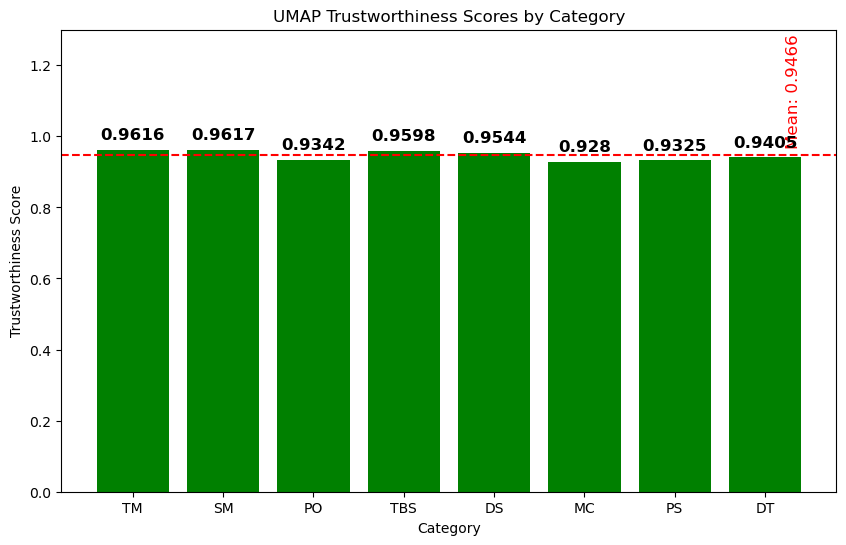

In [7]:
import umap
import numpy as np
import pandas as pd
from sklearn.manifold import trustworthiness
import matplotlib.pyplot as plt

# Assuming df is already loaded and contains 'category', 'P_code', and other features
umap_data = {}
umap_trustworthiness_scores = {}

for category in df['category'].unique():
    subset = df[df['category'] == category].drop(columns=['P_code', 'category']).values
    
    # Initialize the UMAP model to reduce the number of rows (samples) to 1
    umap_model = umap.UMAP(n_neighbors=15, n_components=1, random_state=42, min_dist=0.1, spread=1, metric='euclidean')
    
    # Apply UMAP to the data
    umap_result = umap_model.fit_transform(subset.T)  # Transpose the data to reduce the number of rows
    
    # Reshape the result for better visualization
    umap_data[category] = umap_result.T[0]

    # Calculate trustworthiness and store it
    t_score = trustworthiness(subset.T, umap_result, n_neighbors=1)
    umap_trustworthiness_scores[category] = t_score

# Convert results to DataFrames
umap_df = pd.DataFrame.from_dict(umap_data, orient='index').reset_index()
umap_df.columns = ['category'] + [f'UMAP_{i}' for i in range(1, umap_df.shape[1])]

# Now we will plot the trustworthiness scores for each category
categories = list(umap_trustworthiness_scores.keys())
scores = [umap_trustworthiness_scores[category] for category in categories]

# Calculate the mean value of the trustworthiness scores
mean_value = np.mean(scores)

plt.figure(figsize=(10, 6))
bars = plt.bar(categories, scores, color='green')

# Set the y-axis limit to reduce display pressure
plt.ylim(0, 1.3)

# Plot the mean line and annotate it
plt.axhline(y=mean_value, color='r', linestyle='--')
plt.text(x=max(plt.xlim())*0.95, y=mean_value + 0.02, s=f'Mean: {mean_value:.4f}', 
         verticalalignment='bottom', ha='right', color='r', fontsize=12, rotation=90)

# Annotate the trustworthiness score on top of each bar with larger font size
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 4), 
             ha='center', va='bottom', fontsize=12, color='black', weight='bold')

plt.xlabel('Category')
plt.ylabel('Trustworthiness Score')
plt.title('UMAP Trustworthiness Scores by Category')
plt.show()


# 调整和整合 给reviewer

进行结构化调整，并增加您提出的功能：比较降维前后的最近邻关系，分类性能变化分析，以及UMAP结果的参数敏感性分析

## 最近邻近关系的保持评估

In [11]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import jaccard_score

# Function to calculate Jaccard Index between high-dimensional and low-dimensional nearest neighbors
def calculate_jaccard_index(high_dim_data, low_dim_data, n_neighbors=5):
    # Fit nearest neighbors model on high-dimensional data
    high_dim_nn = NearestNeighbors(n_neighbors=n_neighbors).fit(high_dim_data)
    high_dim_neighbors = high_dim_nn.kneighbors(high_dim_data, return_distance=False)
    
    # Fit nearest neighbors model on low-dimensional data
    low_dim_nn = NearestNeighbors(n_neighbors=n_neighbors).fit(low_dim_data)
    low_dim_neighbors = low_dim_nn.kneighbors(low_dim_data, return_distance=False)
    
    # Calculate Jaccard Index for each point
    jaccard_indices = []
    for i in range(high_dim_data.shape[0]):
        intersection = len(set(high_dim_neighbors[i]).intersection(set(low_dim_neighbors[i])))
        union = len(set(high_dim_neighbors[i]).union(set(low_dim_neighbors[i])))
        jaccard_indices.append(intersection / union)
    
    return np.mean(jaccard_indices)

# Apply Jaccard Index calculation to each category
jaccard_scores = {}
for category in df['category'].unique():
    subset = df[df['category'] == category].drop(columns=['P_code', 'category']).values
    low_dim_data = umap_data[category].reshape(-1, 1)  # Reshape to match UMAP result dimensions
    jaccard_scores[category] = calculate_jaccard_index(subset.T, low_dim_data)

# Display Jaccard scores
print("Jaccard Scores (Nearest Neighbor Preservation):")
for category, score in jaccard_scores.items():
    print(f"{category}: {score:.4f}")


Jaccard Scores (Nearest Neighbor Preservation):
TM: 0.4236
SM: 0.5105
PO: 0.5130
TBS: 0.4805
DS: 0.4859
MC: 0.3342
PS: 0.4241
DT: 0.3214


## 分类性能的比较

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Function to train and evaluate SVM on given data
def evaluate_svm(data, labels):
    # Initialize SVM model
    svm_model = SVC(probability=True, random_state=42)
    svm_model.fit(data, labels)
    
    # Predict and calculate accuracy
    predictions = svm_model.predict(data)
    accuracy = accuracy_score(labels, predictions)
    
    # Calculate AUC for multi-class classification
    # We need to binarize the labels for multiclass AUC calculation
    labels_binarized = label_binarize(labels, classes=np.unique(labels))
    auc = roc_auc_score(labels_binarized, svm_model.predict_proba(data), multi_class='ovo')
    
    return accuracy, auc

# Evaluate SVM on original high-dimensional data
high_dim_accuracy, high_dim_auc = evaluate_svm(df.drop(columns=['P_code', 'category']).values, df['category'].values)

# Evaluate SVM on UMAP-reduced data
umap_accuracy, umap_auc = evaluate_svm(umap_df.iloc[:, 1:].values, umap_df['category'].values)

# Display results
print(f"High-Dimensional Data: Accuracy = {high_dim_accuracy:.4f}, AUC = {high_dim_auc:.4f}")
print(f"UMAP-Reduced Data: Accuracy = {umap_accuracy:.4f}, AUC = {umap_auc:.4f}")



High-Dimensional Data: Accuracy = 0.6429, AUC = 0.5724
UMAP-Reduced Data: Accuracy = 1.0000, AUC = 0.0000


## UMAP参数敏感性分析

c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
c:\Users\Eric\.conda\envs\lymai3.9\lib\site-packages\umap\umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for p

Sensitivity Analysis for TM:
  n_neighbors=10, min_dist=0.1: Jaccard Score = 0.4749
  n_neighbors=10, min_dist=0.5: Jaccard Score = 0.4357
  n_neighbors=10, min_dist=0.9: Jaccard Score = 0.4021
  n_neighbors=15, min_dist=0.1: Jaccard Score = 0.4236
  n_neighbors=15, min_dist=0.5: Jaccard Score = 0.3876
  n_neighbors=15, min_dist=0.9: Jaccard Score = 0.3932
  n_neighbors=20, min_dist=0.1: Jaccard Score = 0.4396
  n_neighbors=20, min_dist=0.5: Jaccard Score = 0.3892
  n_neighbors=20, min_dist=0.9: Jaccard Score = 0.4466
Sensitivity Analysis for SM:
  n_neighbors=10, min_dist=0.1: Jaccard Score = 0.5015
  n_neighbors=10, min_dist=0.5: Jaccard Score = 0.5215
  n_neighbors=10, min_dist=0.9: Jaccard Score = 0.4890
  n_neighbors=15, min_dist=0.1: Jaccard Score = 0.5105
  n_neighbors=15, min_dist=0.5: Jaccard Score = 0.5309
  n_neighbors=15, min_dist=0.9: Jaccard Score = 0.5268
  n_neighbors=20, min_dist=0.1: Jaccard Score = 0.4898
  n_neighbors=20, min_dist=0.5: Jaccard Score = 0.4986
  n_nei

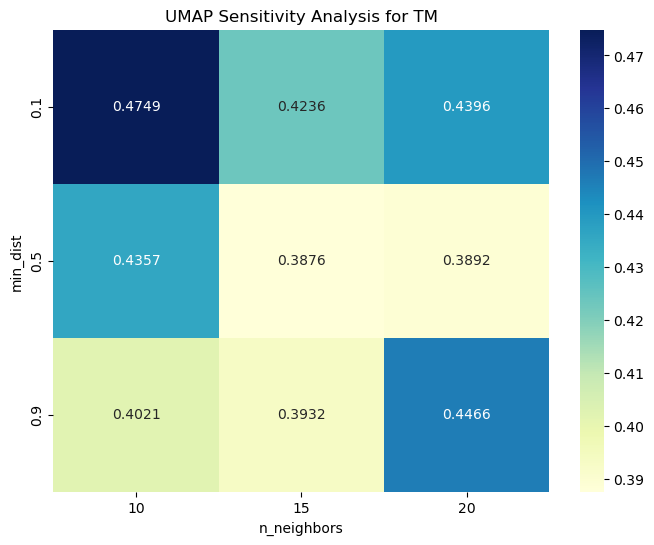

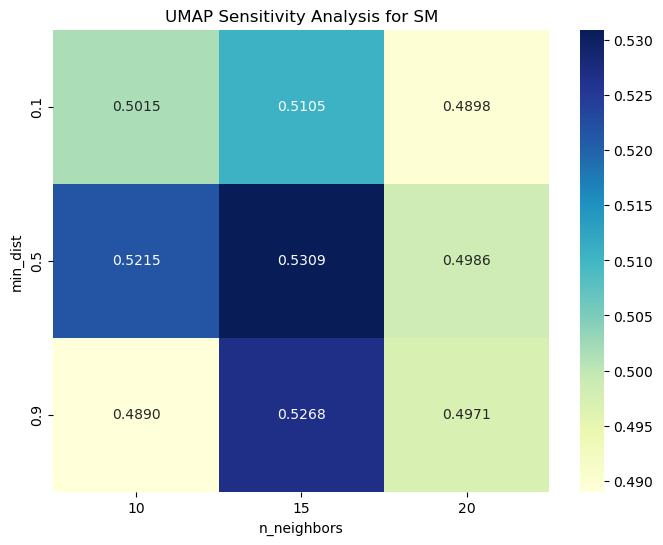

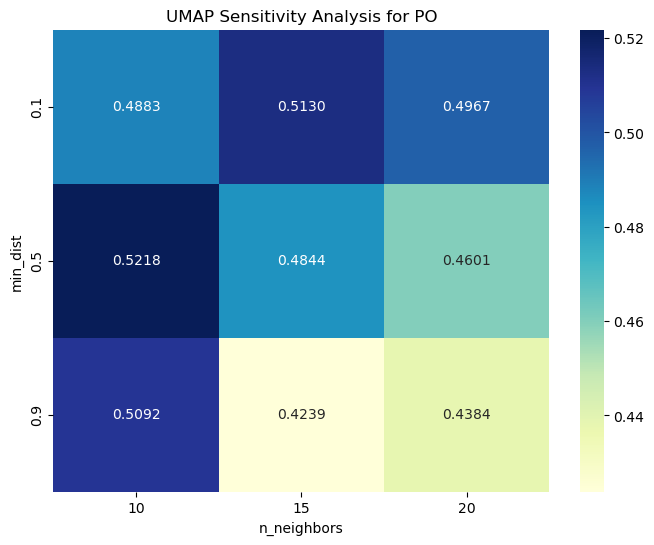

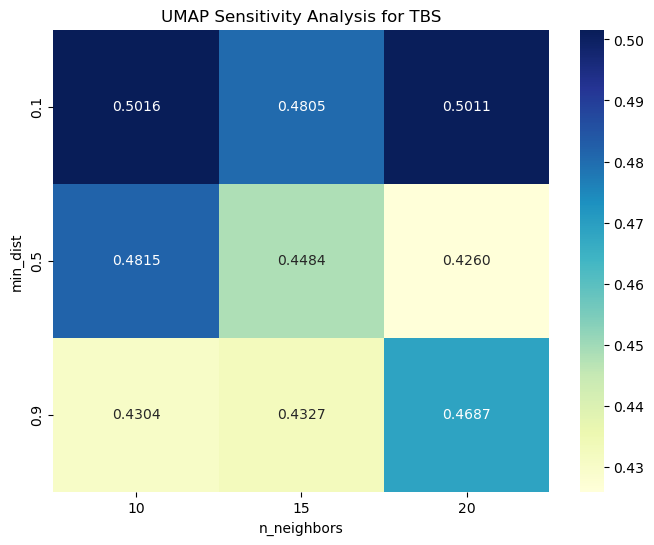

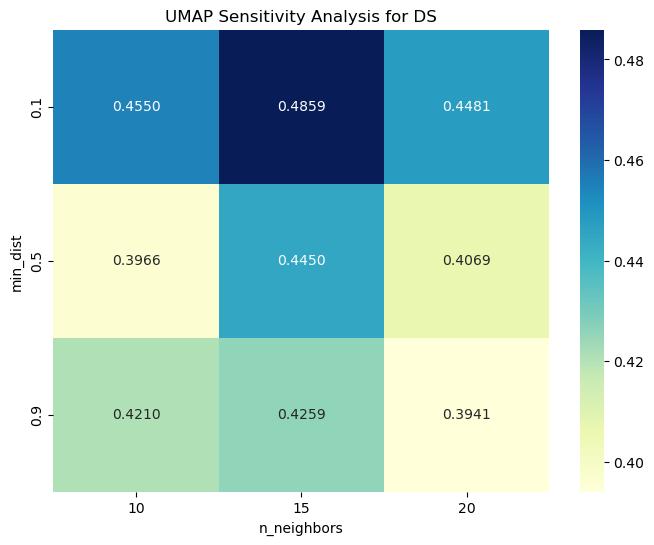

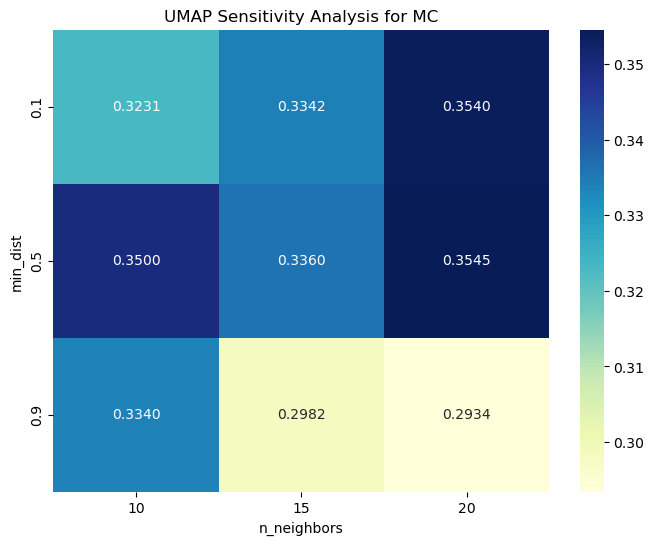

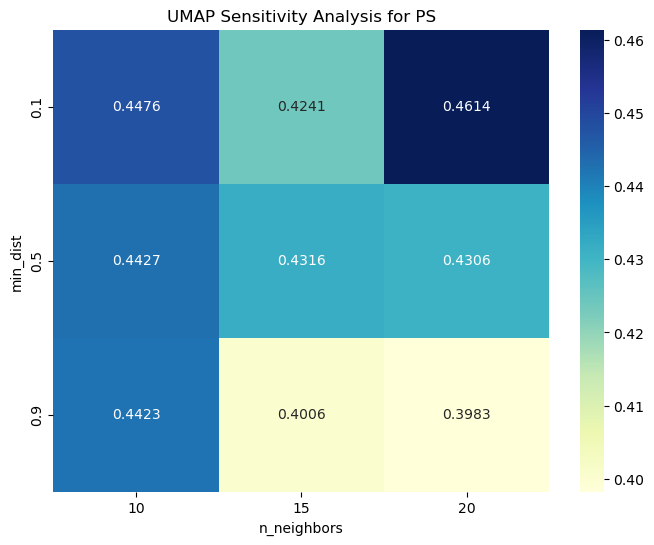

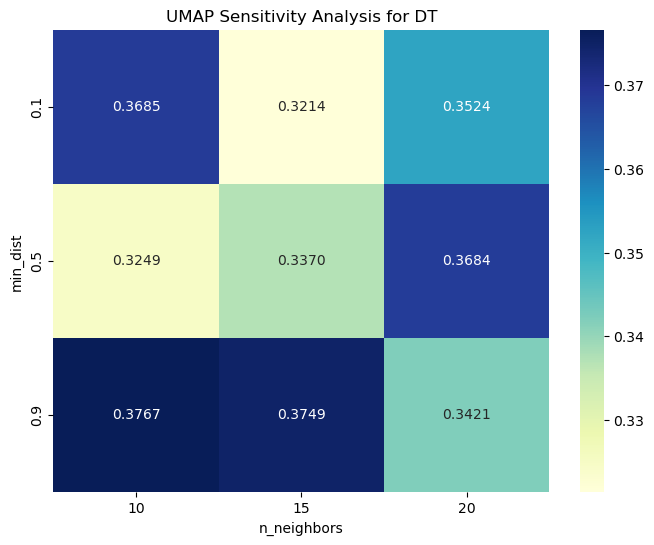

In [9]:
import pandas as pd
import umap
import matplotlib.pyplot as plt
import seaborn as sns

# Function to calculate Jaccard Index between high-dimensional and low-dimensional nearest neighbors
def calculate_jaccard_index(high_dim_data, low_dim_data, n_neighbors=5):
    from sklearn.neighbors import NearestNeighbors
    high_dim_nn = NearestNeighbors(n_neighbors=n_neighbors).fit(high_dim_data)
    high_dim_neighbors = high_dim_nn.kneighbors(high_dim_data, return_distance=False)
    
    low_dim_nn = NearestNeighbors(n_neighbors=n_neighbors).fit(low_dim_data)
    low_dim_neighbors = low_dim_nn.kneighbors(low_dim_data, return_distance=False)
    
    jaccard_indices = []
    for i in range(high_dim_data.shape[0]):
        intersection = len(set(high_dim_neighbors[i]).intersection(set(low_dim_neighbors[i])))
        union = len(set(high_dim_neighbors[i]).union(set(low_dim_neighbors[i])))
        jaccard_indices.append(intersection / union)
    
    return np.mean(jaccard_indices)

# Function to evaluate UMAP with varying parameters and return Jaccard scores
def evaluate_umap_sensitivity(data, n_neighbors_values, min_dist_values):
    sensitivity_results = {}
    
    for n_neighbors in n_neighbors_values:
        for min_dist in min_dist_values:
            umap_model = umap.UMAP(n_neighbors=n_neighbors, n_components=1, random_state=42, min_dist=min_dist, metric='euclidean')
            umap_result = umap_model.fit_transform(data.T)
            jaccard_score = calculate_jaccard_index(data.T, umap_result)
            sensitivity_results[(n_neighbors, min_dist)] = jaccard_score
            
    return sensitivity_results

# Test UMAP sensitivity to n_neighbors and min_dist parameters
n_neighbors_values = [10, 15, 20]
min_dist_values = [0.1, 0.5, 0.9]

umap_sensitivity_results = {}
for category in df['category'].unique():
    subset = df[df['category'] == category].drop(columns=['P_code', 'category']).values
    umap_sensitivity_results[category] = evaluate_umap_sensitivity(subset, n_neighbors_values, min_dist_values)

# Display sensitivity results
for category, results in umap_sensitivity_results.items():
    print(f"Sensitivity Analysis for {category}:")
    for params, score in results.items():
        print(f"  n_neighbors={params[0]}, min_dist={params[1]}: Jaccard Score = {score:.4f}")

# Function to prepare heatmap data
def prepare_heatmap_data(sensitivity_results, n_neighbors_values, min_dist_values):
    heatmap_data = {n_neighbors: [] for n_neighbors in n_neighbors_values}
    
    for n_neighbors in n_neighbors_values:
        for min_dist in min_dist_values:
            jaccard_score = sensitivity_results.get((n_neighbors, min_dist), None)
            heatmap_data[n_neighbors].append(jaccard_score)
    
    heatmap_df = pd.DataFrame(heatmap_data, index=min_dist_values)
    return heatmap_df

# Visualize the sensitivity analysis results for each category
for category, results in umap_sensitivity_results.items():
    heatmap_df = prepare_heatmap_data(results, n_neighbors_values, min_dist_values)
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(heatmap_df, annot=True, cmap="YlGnBu", cbar=True, fmt=".4f")
    plt.title(f'UMAP Sensitivity Analysis for {category}')
    plt.xlabel('n_neighbors')
    plt.ylabel('min_dist')
    plt.show()


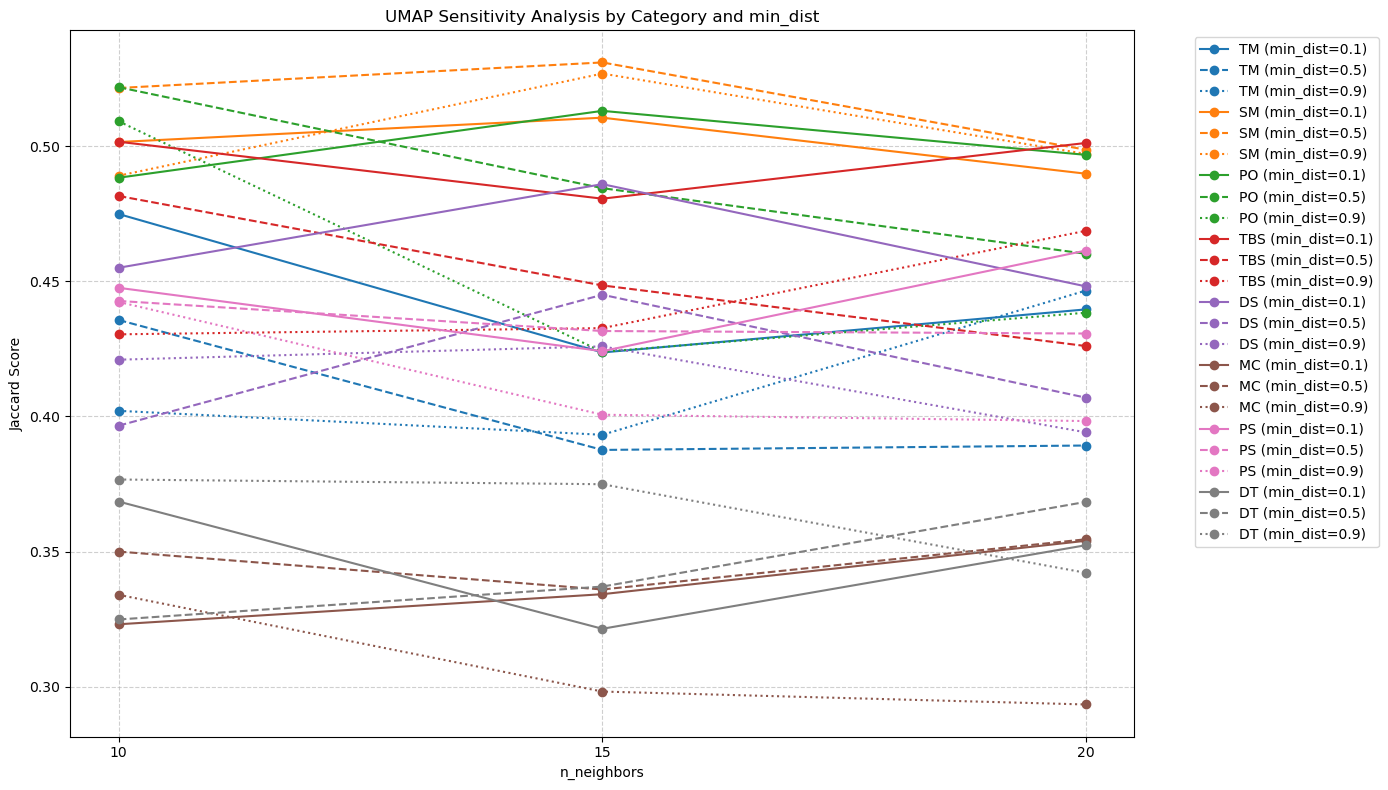

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to prepare data for the line plot
def prepare_lineplot_data(umap_sensitivity_results, n_neighbors_values, min_dist_values):
    data = []
    for category, results in umap_sensitivity_results.items():
        for min_dist in min_dist_values:
            scores = [results[(n_neighbors, min_dist)] for n_neighbors in n_neighbors_values]
            data.append(pd.DataFrame({
                'n_neighbors': n_neighbors_values,
                'Jaccard Score': scores,
                'Category': category,
                'min_dist': min_dist
            }))
    return pd.concat(data)

# Prepare data for plotting
lineplot_df = prepare_lineplot_data(umap_sensitivity_results, n_neighbors_values, min_dist_values)

# Set up the figure and axis
plt.figure(figsize=(14, 8))

# Define a color palette for the categories
palette = sns.color_palette("tab10", len(lineplot_df['Category'].unique()))

# Plot each category with the same color and different line styles for min_dist
for i, category in enumerate(lineplot_df['Category'].unique()):
    subset = lineplot_df[lineplot_df['Category'] == category]
    for j, min_dist in enumerate(min_dist_values):
        subset_min_dist = subset[subset['min_dist'] == min_dist]
        plt.plot(subset_min_dist['n_neighbors'], subset_min_dist['Jaccard Score'], marker='o', 
                 linestyle='-' if j == 0 else '--' if j == 1 else ':',
                 color=palette[i], label=f'{category} (min_dist={min_dist})')

# Configure the plot
plt.xlabel('n_neighbors')
plt.ylabel('Jaccard Score')
plt.title('UMAP Sensitivity Analysis by Category and min_dist')
plt.xticks(n_neighbors_values)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show the plot
plt.show()


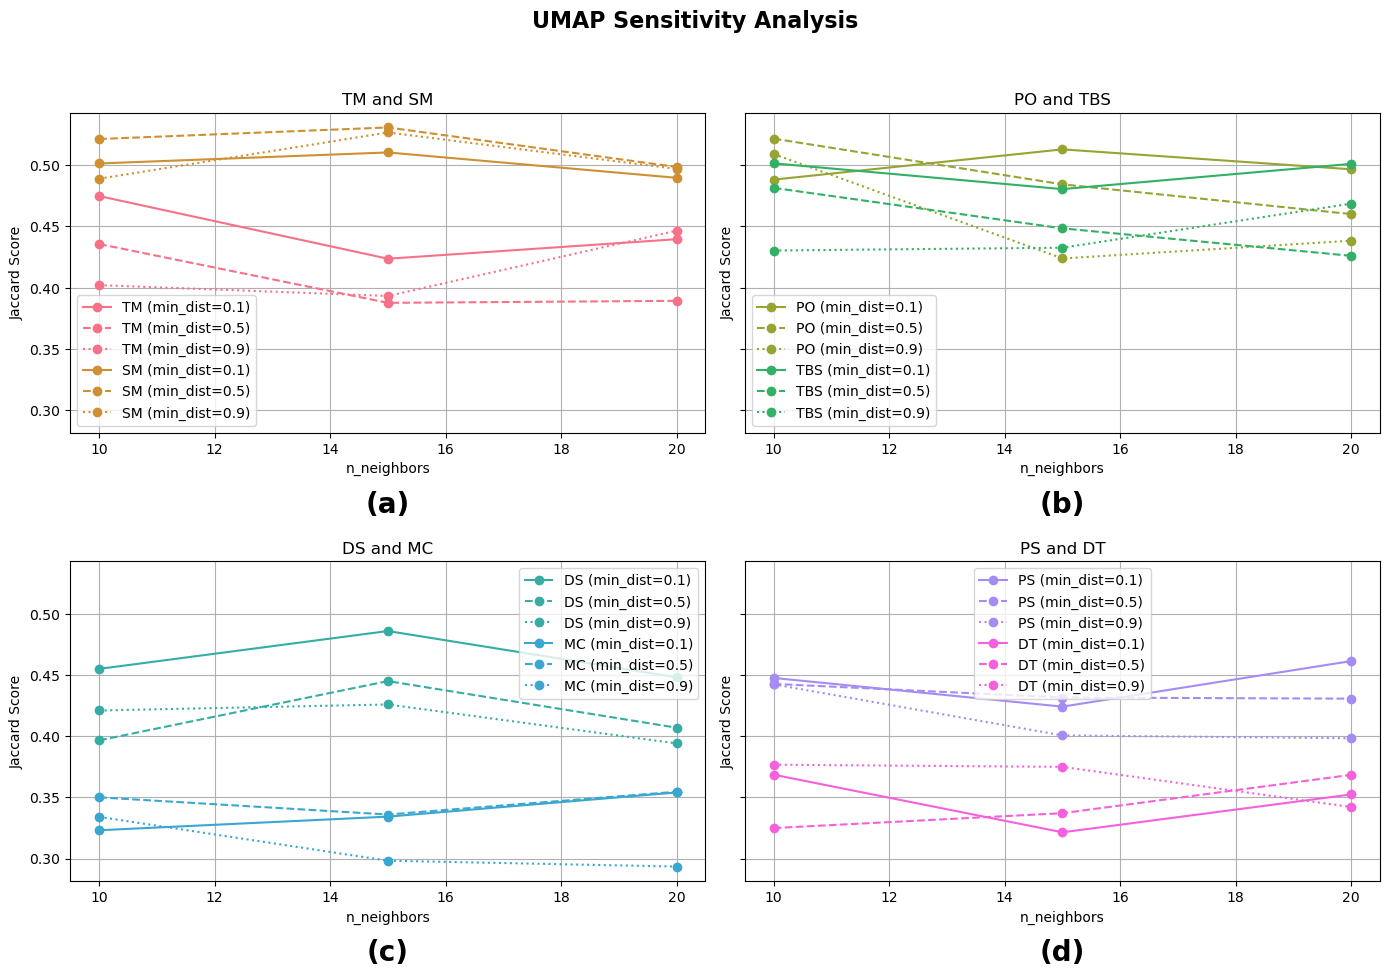

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Function to prepare data for the line plot
def prepare_lineplot_data(umap_sensitivity_results, n_neighbors_values, min_dist_values):
    data = []
    for category, results in umap_sensitivity_results.items():
        for min_dist in min_dist_values:
            scores = [results[(n_neighbors, min_dist)] for n_neighbors in n_neighbors_values]
            data.append(pd.DataFrame({
                'n_neighbors': n_neighbors_values,
                'Jaccard Score': scores,
                'Category': category,
                'min_dist': min_dist
            }))
    return pd.concat(data)

# Prepare data for plotting
lineplot_df = prepare_lineplot_data(umap_sensitivity_results, n_neighbors_values, min_dist_values)

# Define the pairs of variables to plot together
variable_pairs = [('TM', 'SM'), ('PO', 'TBS'), ('DS', 'MC'), ('PS', 'DT')]

# Set up the figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=True)

# Define a unique color palette for each category
unique_categories = [var for pair in variable_pairs for var in pair]
palette = sns.color_palette("husl", len(unique_categories))
color_map = {category: palette[i] for i, category in enumerate(unique_categories)}

# Plot each pair of variables
for idx, (ax, (var1, var2)) in enumerate(zip(axes.flatten(), variable_pairs)):
    for category in [var1, var2]:
        subset = lineplot_df[lineplot_df['Category'] == category]
        color = color_map[category]
        for j, min_dist in enumerate(min_dist_values):
            subset_min_dist = subset[subset['min_dist'] == min_dist]
            ax.plot(subset_min_dist['n_neighbors'], subset_min_dist['Jaccard Score'], marker='o',
                    linestyle='-' if j == 0 else '--' if j == 1 else ':',
                    color=color, label=f'{category} (min_dist={min_dist})')
    
    ax.set_title(f'{var1} and {var2}')
    ax.set_xlabel('n_neighbors')
    ax.set_ylabel('Jaccard Score')
    ax.grid(True)
    ax.legend(loc='best')  # Place legend inside the plot area
    
    # Add subplot label
    ax.text(0.5, -0.25, f"({chr(97 + idx)})", transform=ax.transAxes, 
            size=20, weight='bold', ha='center')

# Set the main title for the figure
fig.suptitle('UMAP Sensitivity Analysis', fontsize=16, weight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to make room for the suptitle
plt.show()
